# Data formatting

The following code is useful to correctly format, manipulate and save as a CVS file the temperature dataset we need to work with

In [2]:
# Importing packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import pyarrow

In [3]:
path_TEMP_in = "../ambient.csv"
path_TEMP_out = "../pcie.csv"
dataset_TEMP_in = pd.read_csv(path_TEMP_in)
dataset_TEMP_out = pd.read_csv(path_TEMP_out)

# Casting of node values into integers and timestamp into datetimes
dataset_TEMP_in['timestamp'] = pd.to_datetime(dataset_TEMP_in['timestamp'])
dataset_TEMP_in.set_index('timestamp', inplace=True)
dataset_TEMP_out['timestamp'] = pd.to_datetime(dataset_TEMP_out['timestamp'])
dataset_TEMP_out.set_index('timestamp', inplace=True)

print(dataset_TEMP_in.head())
print(dataset_TEMP_out.head())

                             r205n01    r205n02    r205n03    r205n04  \
timestamp                                                               
2020-04-01 07:15:00+00:00  21.533333  21.413334  21.600000  21.800000   
2020-04-01 07:30:00+00:00  21.568890  21.502222  21.600000  21.804443   
2020-04-01 07:45:00+00:00  21.577778  21.524445  21.600000  21.822222   
2020-04-01 08:00:00+00:00  21.506666  21.400000  21.600000  21.800000   
2020-04-01 08:15:00+00:00  21.493334  21.400000  21.595556  21.791111   

                             r205n05    r205n06    r205n07    r205n08  \
timestamp                                                               
2020-04-01 07:15:00+00:00  22.393333  22.646667  23.406666  24.540000   
2020-04-01 07:30:00+00:00  22.400000  22.671110  23.368889  24.528889   
2020-04-01 07:45:00+00:00  22.386667  22.657778  23.391111  24.515556   
2020-04-01 08:00:00+00:00  22.280000  22.506666  23.191110  24.377777   
2020-04-01 08:15:00+00:00  22.200000  22.333334  2

In [4]:
# We decided to drop the first months
dataset_TEMP_in = dataset_TEMP_in.loc['2020-05-01 00:00:00+00:00':'2022-09-28 22:00:00+00:00']
dataset_TEMP_out = dataset_TEMP_out.loc['2020-05-01 00:00:00+00:00':'2022-09-28 22:00:00+00:00']

# Resampling of the DataFrame on an hourly basis and calculate the mean
dataset_TEMP_in = dataset_TEMP_in.resample('1h').mean()
dataset_TEMP_out = dataset_TEMP_out.resample('1h').mean()

KeyboardInterrupt: 

In [ ]:
# Substitution of the NaN values present using a linear interpolation method
dataset_TEMP_in.interpolate(axis=0, method='linear', inplace=True)
dataset_TEMP_in.interpolate(axis=1, method='linear', inplace=True)

dataset_TEMP_out.interpolate(axis=0, method='linear', inplace=True)
dataset_TEMP_out.interpolate(axis=1, method='linear', inplace=True)

In [ ]:
# Dataset exporting as a CSV file for later use
output_file = '../TemperatureDataset_inlet.csv'
dataset_TEMP_in.to_csv(output_file, index_label='timestamp')

output_file = '../TemperatureDataset_outlet.csv'
dataset_TEMP_out.to_csv(output_file, index_label='timestamp')

# Data plotting

In [ ]:
from datetime import datetime, timedelta
from pandas.plotting import register_matplotlib_converters
from statsmodels.tsa.seasonal import STL
import matplotlib.ticker as ticker
from matplotlib.colors import LinearSegmentedColormap

In [ ]:
# Function that plots a specific node or set of nodes
def showplot(dataset_node, size, label, color):
    plt.figure(figsize=size)
    plt.tight_layout() 
    plt.grid(True)
    plt.gca().yaxis.labelpad = 10
    plt.ylabel('°C', fontweight='bold', fontsize=15)
    plt.xticks(fontweight='bold', fontsize=15)
    plt.yticks(fontweight='bold', fontsize=15)
    plt.title('Temperature', fontweight='bold', fontsize=15)
    plt.plot(dataset_node, linewidth=2, label=label, color=color)
    plt.legend(prop={'weight': 'bold', 'size': 15})
    plt.show

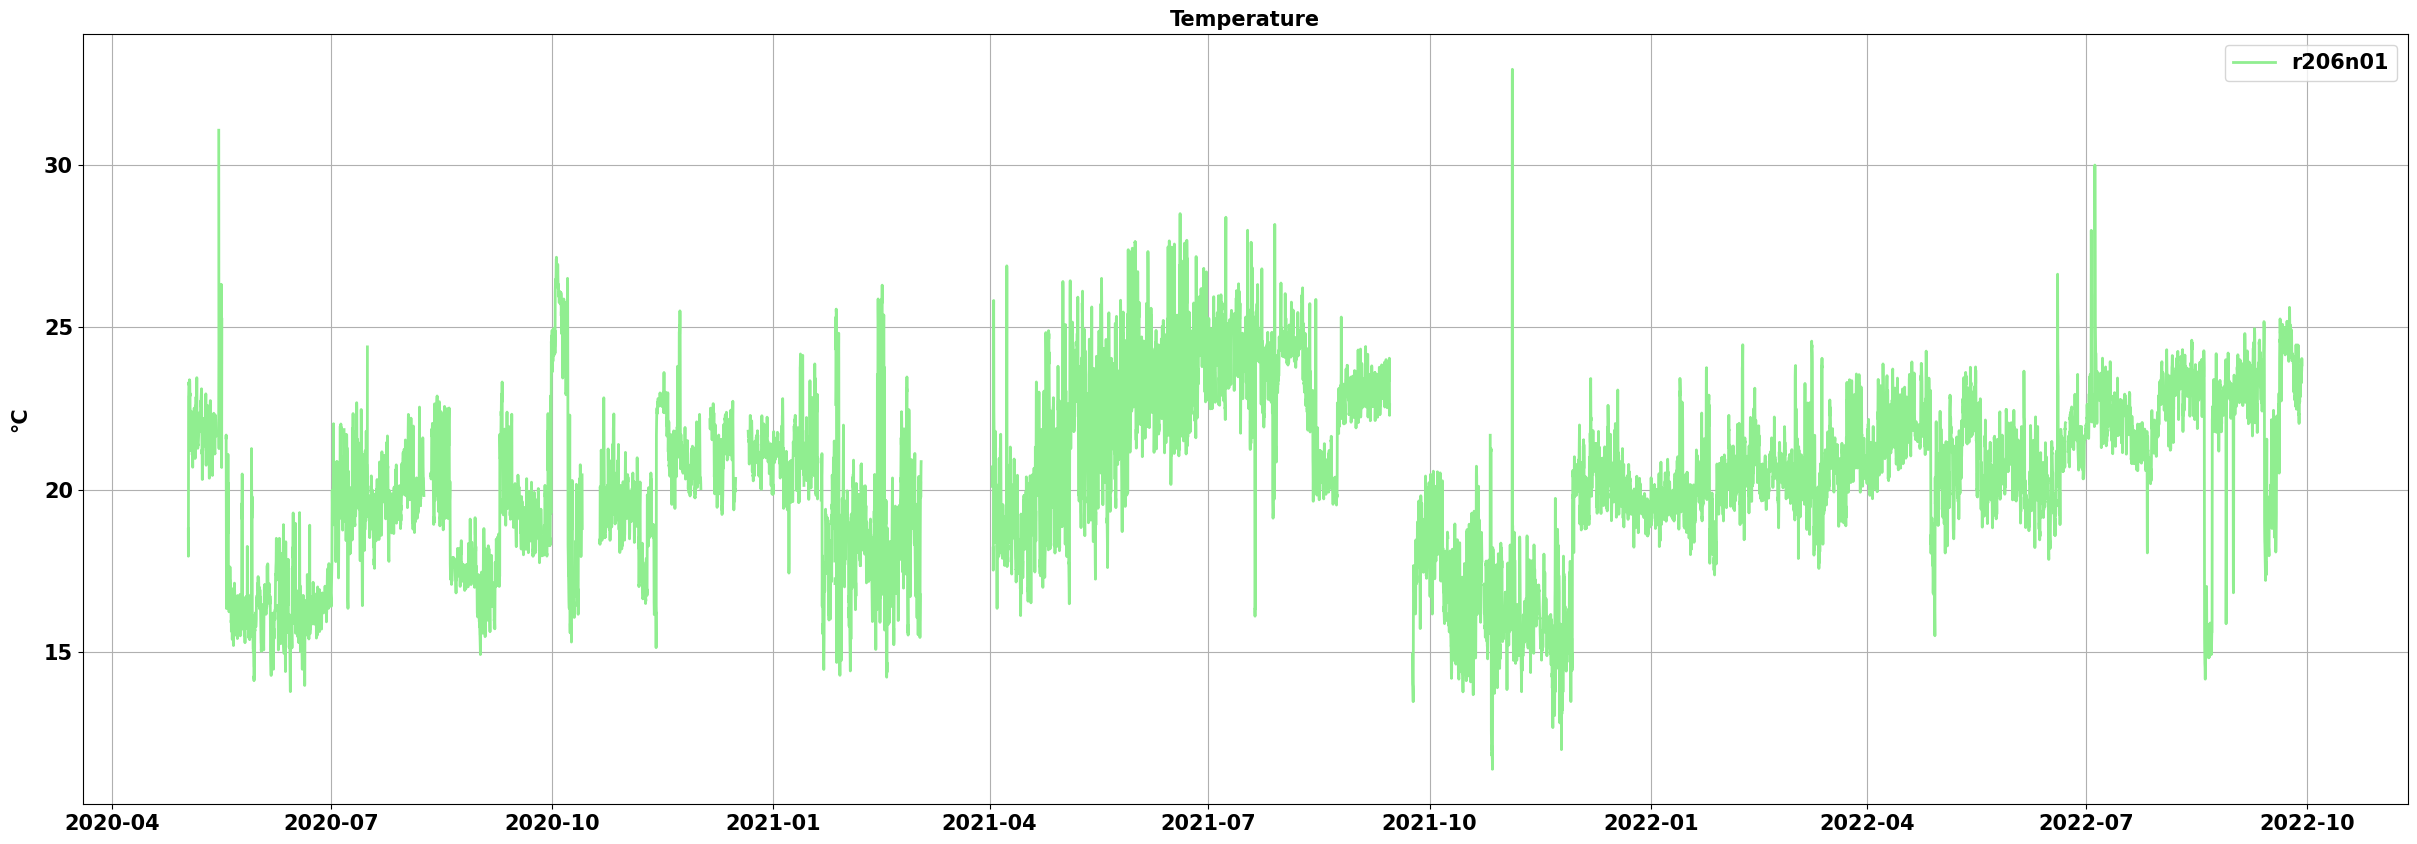

In [8]:
# Plotting specific nodes in time
showplot(dataset_TEMP_in['r206n01'], (30,10), 'r206n01', 'lightgreen')

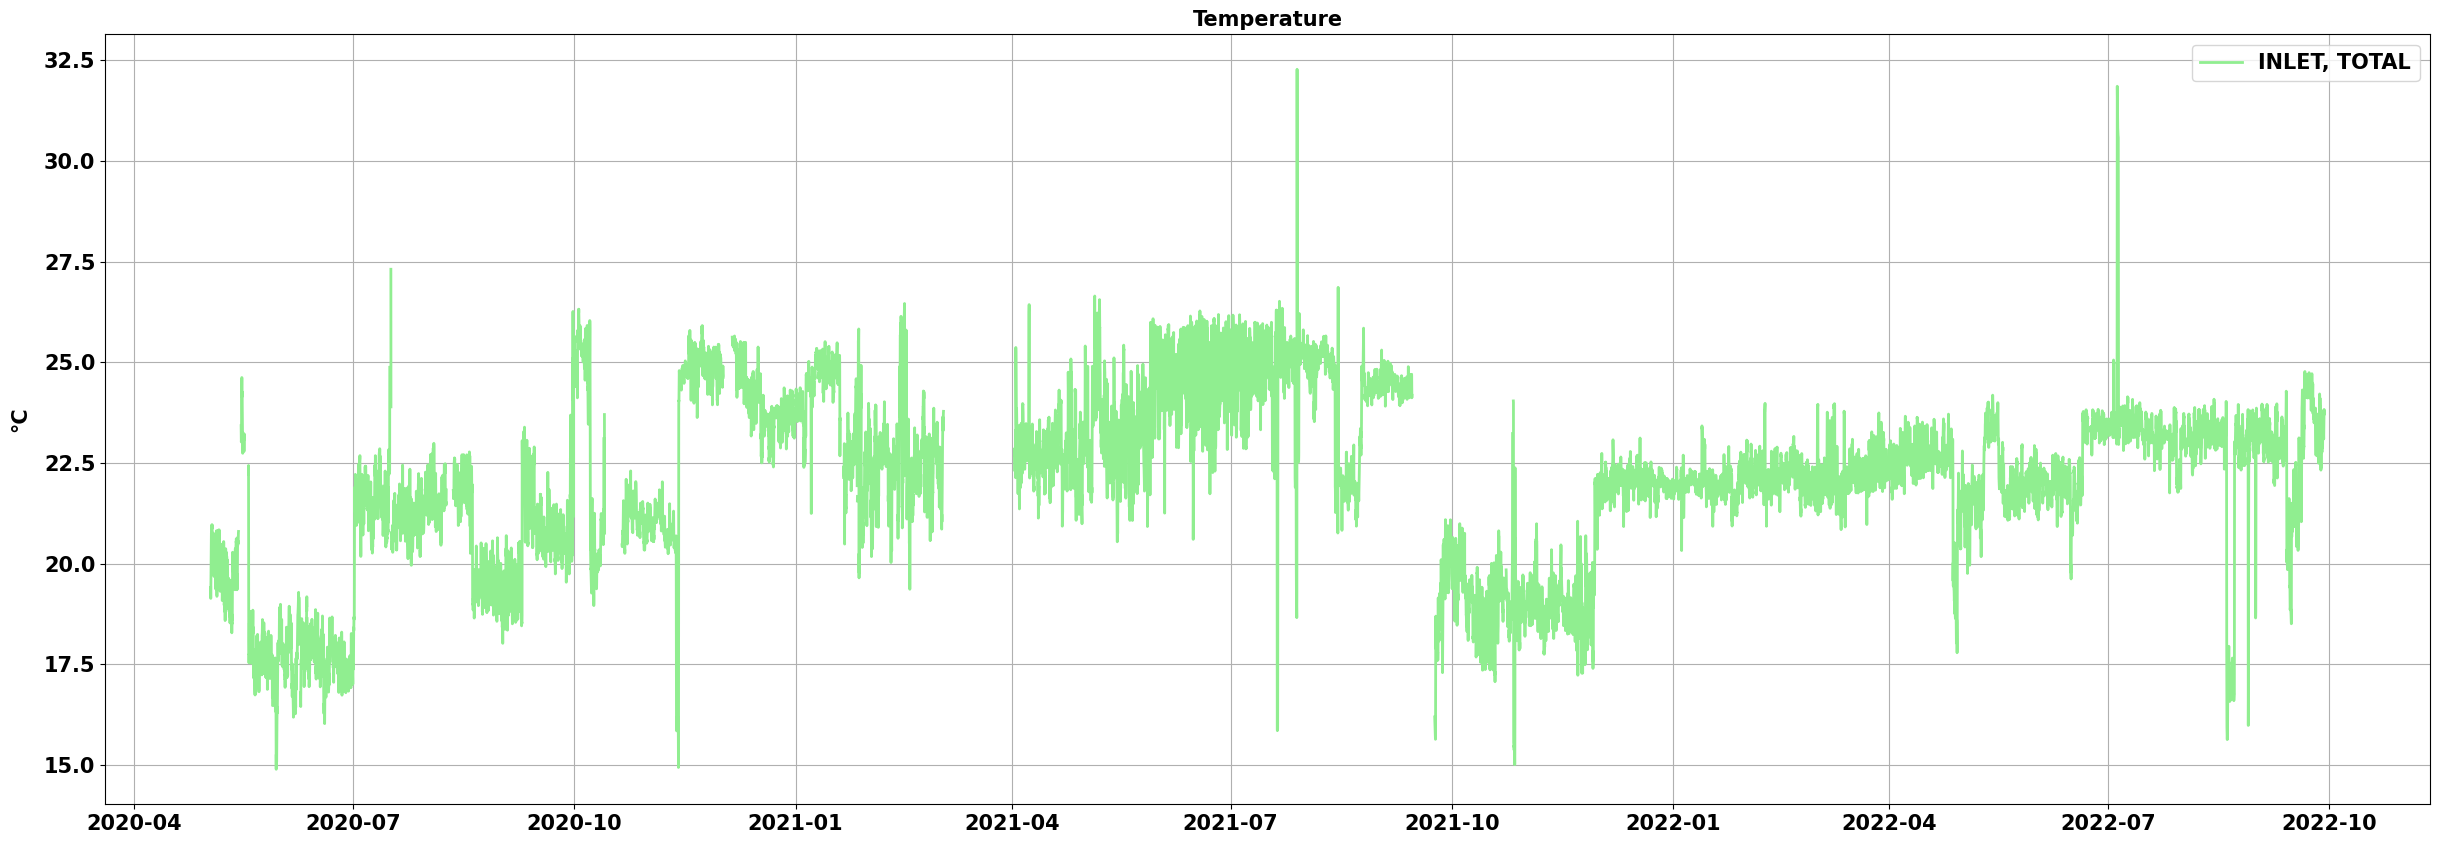

In [9]:
# To get (and plot) the mean temperature in all nodes, each sample of time
showplot(dataset_TEMP_in.mean(axis=1), (30,10), 'INLET, TOTAL', 'lightgreen')

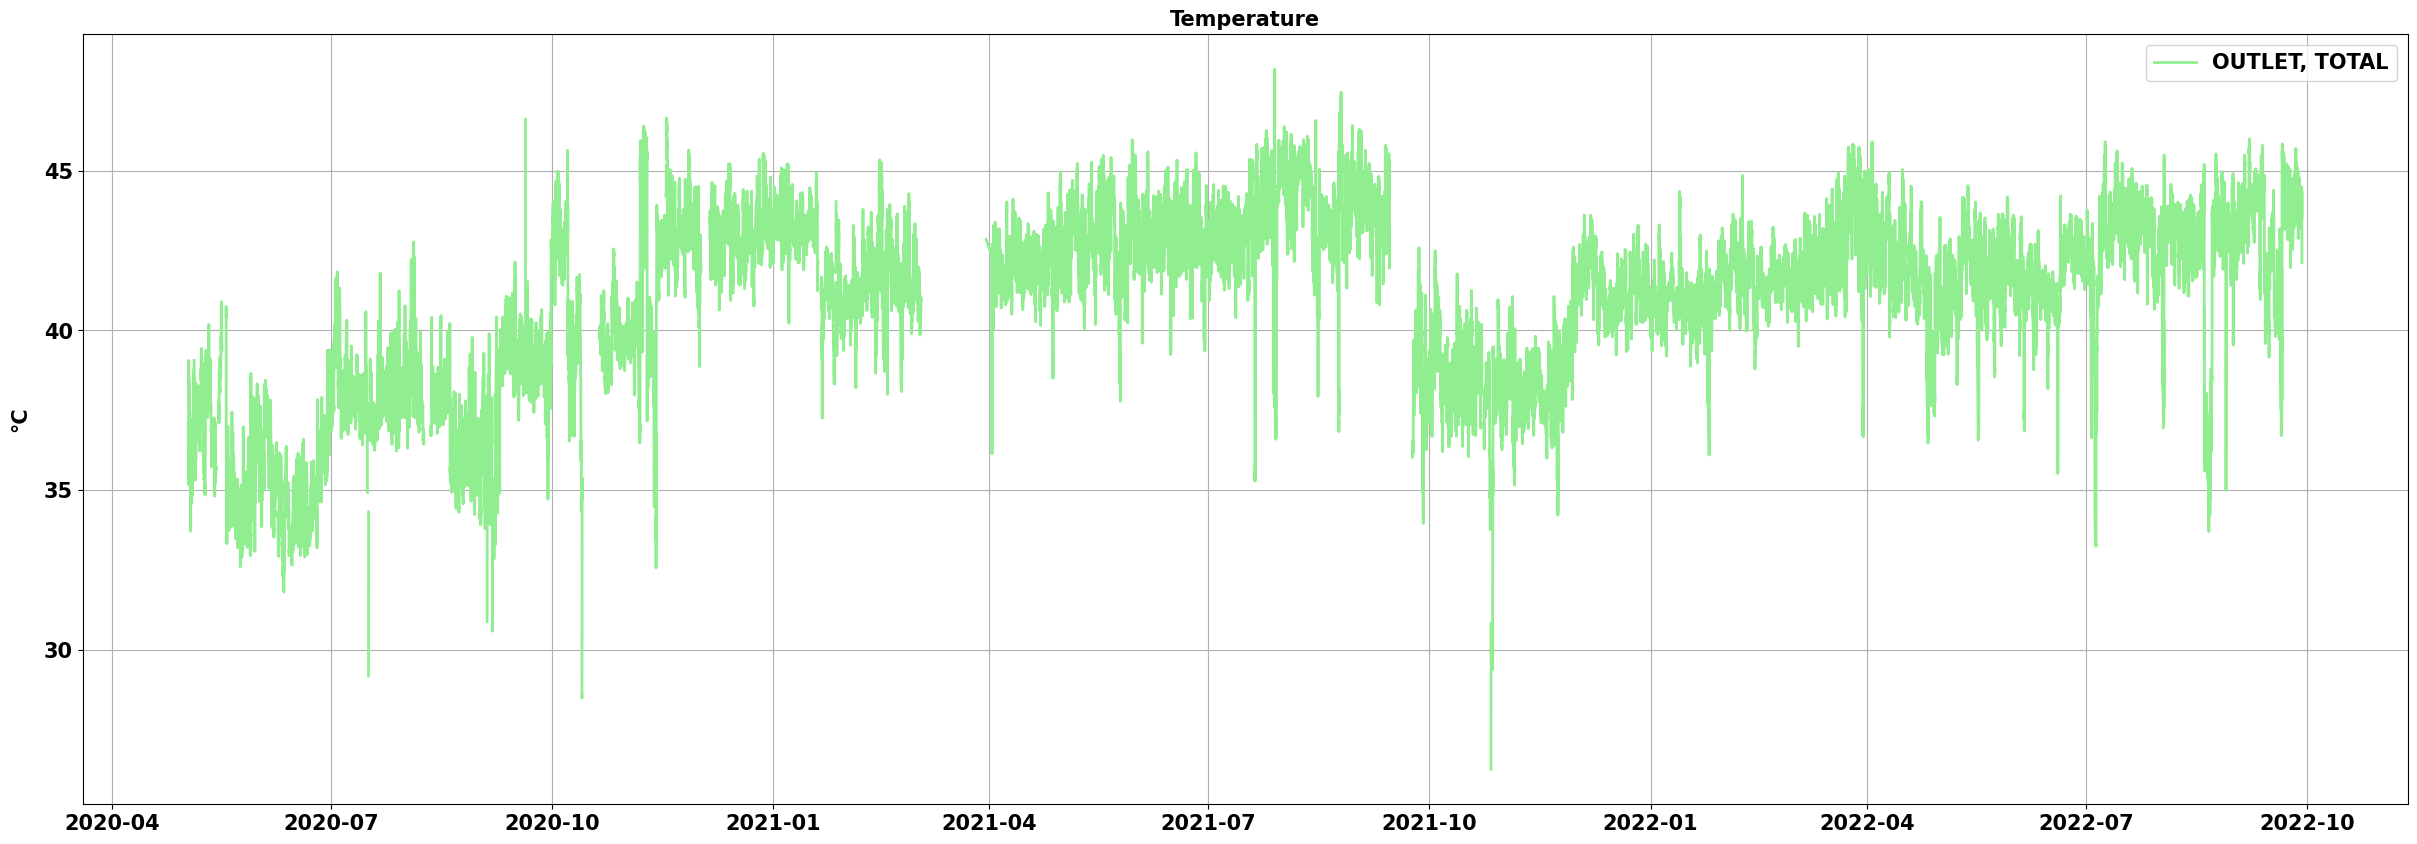

In [10]:
# To get (and plot) the mean temperature in all nodes, each sample of time
showplot(dataset_TEMP_out.mean(axis=1), (30,10), 'OUTLET, TOTAL', 'lightgreen')